In [1]:
%matplotlib inline

import sqlite3 as lite
import sys

con = lite.connect('tweets.db')

with con:    
    
    cur = con.cursor()    
    cur.execute("SELECT * FROM tweets")

    rows = cur.fetchall()

In [2]:
rows[0]

(u'Wed Aug 10 11:28:30 +0000 2016',
 u'ICYMI: #Delta debacle strands Round Rock teen in Europe. Dream trip turned travel nightmare https://t.co/wxjkJJwuWl https://t.co/xSRZqeyWdM',
 u'Austin, Texas',
 0)

In [3]:
import pandas as pd
pd.Series(map(lambda x:x[2], rows)).value_counts()[:10]

Nigeria            2195
United States      1761
Lagos, Nigeria     1328
Los Angeles, CA     795
New York, NY        753
Atlanta, GA         742
USA                 588
Lagos               436
Worldwide           390
Global              382
dtype: int64

In [4]:
from datetime import datetime

In [5]:
def convert_time(date):
    date_convert = ' '.join(str(date).split()[:-2])
    time = date_convert + ' ' + str(date).split()[-1]
    return datetime.strptime(time,'%a %b %d %H:%M:%S %Y')
    
time = map(convert_time,map(lambda x:x[0], rows))

In [6]:
tweets_dict = {'time':pd.Series(time),
               'content':map(lambda x:x[1], rows),
               'location':map(lambda x:x[2],rows),
               'Retweet':map(lambda x:x[3],rows)
              }

In [7]:
df_tweets = pd.DataFrame(tweets_dict)
df_tweets.head()

,Retweet,content,location,time
0,0,ICYMI: #Delta debacle strands Round Rock teen ...,"Austin, Texas",2016-08-10 11:28:30
1,0,RT @hartman3000: 3 cancelled @delta flights an...,None,2016-08-10 11:28:34
2,0,RT @naturvardsverk: Vad betyder miljön för dig...,None,2016-08-10 11:28:39
3,0,Trzeci dzień problemów. Delta Air Lines odwoła...,Poland,2016-08-10 11:28:39
4,0,"RT @OlufemiAjasa: The Niger Delta Crusaders,Mu...",Jos.Plateau state.Nigeria,2016-08-10 11:28:40


In [8]:
def extract_day(time):
    return time.day
def extract_hour(time):
    return time.hour

In [9]:
df_tweets['day'] = map(extract_day,df_tweets['time'])
df_tweets['hour'] = map(extract_hour,df_tweets['time'])

In [10]:
import matplotlib.pyplot as plt

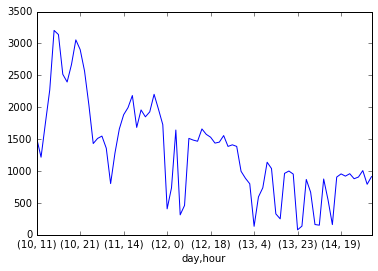

In [11]:
df_tweets.groupby(['day','hour']).count()['time'].plot(label = 'Tweets Count')

In [13]:
df_tweets[df_tweets['location'] == 'United States']

,Retweet,content,location,time,day,hour
9,0,Delta says 90 more flight cancellations; other...,United States,2016-08-10 11:28:43,10,11
17,0,Delta says 90 more flight cancellations; other...,United States,2016-08-10 11:28:57,10,11
23,0,Delta power outage: What a passenger can do wh...,United States,2016-08-10 11:29:05,10,11
105,0,Delta says 90 more flight cancellations; other...,United States,2016-08-10 11:30:35,10,11
108,0,RT @David_Kerley: @Delta cancels at least 90 f...,United States,2016-08-10 11:30:38,10,11
109,0,United / Delta – $130: Detroit – Denver (and v...,United States,2016-08-10 11:30:40,10,11
137,0,Delta says 90 more flight cancellations; other...,United States,2016-08-10 11:31:09,10,11
195,0,Delta says 90 more flight cancellations; other...,United States,2016-08-10 11:32:30,10,11
339,0,https://t.co/Id2QTJFR3U,United States,2016-08-10 11:35:29,10,11
451,0,RT @IamMikaze: It's 2 am at LAX. This is my cu...,United States,2016-08-10 11:38:30,10,11
